# Alpha Calculation And W+jet Signal Shape

1. Calculate alpha using MC only
    1. Ratio of signal to side-band region
1. Get 1-sigma up/down alpha shape
1. Grab corrected W+jet shape and normalization in side-band region from background estimation code.
1. Using alpha get the W+jet shape and normalization in signal region

In [1]:
import ROOT as r

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

import CMS_lumi, tdrstyle

tdrstyle.setTDRStyle()

Welcome to JupyROOT 6.08/05


<ROOT.TStyle object ("tdrStyle") at 0x528c210>

In [2]:
#fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_AlphaRatioBkgEst_2018_03_27_02h28/HaddedFiles/Hadds_for_BkgEstimation/WWTree_WJets.root")

fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")


treeIn = fin.Get("otree")

# Define the cuts
cutString_SideBand       =  "wSampleWeight*35867.06*btag0Wgt*totalEventWeight_2Lep*((type==0||type==1) && (l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (l_pt2>30 && (((type==0)&&(abs(l_eta2)<2.4)) || ((type==1)&&((abs(l_eta2)<2.5)&&!(abs(l_eta2)>1.4442 && abs(l_eta2)<1.566))))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((((PuppiAK8_jet_mass_so_corr>40) && (PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>110) && (PuppiAK8_jet_mass_so_corr<150)))) && (mass_llj_PuppiAK8>600))"

cutString_Signal         =  "wSampleWeight*35867.06*btag0Wgt*totalEventWeight_2Lep*((type==0||type==1) && (l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (l_pt2>30 && (((type==0)&&(abs(l_eta2)<2.4)) || ((type==1)&&((abs(l_eta2)<2.5)&&!(abs(l_eta2)>1.4442 && abs(l_eta2)<1.566))))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((((PuppiAK8_jet_mass_so_corr>65) && (PuppiAK8_jet_mass_so_corr<110)))) && (mass_llj_PuppiAK8>600))"

### Get W+jet histogram in signal, lower side-band and in whole side-band (low as well as high) region

In [3]:
leg = r.TLegend(0.45,0.95,.95,0.75)

hSignal = r.TH1D("hSignal","",38,600,2500)
hSignal.SetMarkerColor(1)
hSignal.SetLineColor(1)
hSignal.SetLineWidth(3)
hSignal.SetMarkerSize(1)
leg.AddEntry(hSignal,"signal region (MC)")


hSideBand = r.TH1D("hSideBand","",38,600,2500)
hSideBand.SetMarkerColor(2)
hSideBand.SetLineColor(2)
hSideBand.SetLineWidth(3)
hSideBand.SetMarkerSize(1)
leg.AddEntry(hSideBand,"SideBand Region (MC)")


treeIn.Draw("mass_llj_PuppiAK8>>hSideBand",cutString_SideBand)
treeIn.Draw("mass_llj_PuppiAK8>>hSignal",cutString_Signal)

75L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


### Plot the Wjet histogram in signal region, side-band region and lower side-band region

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


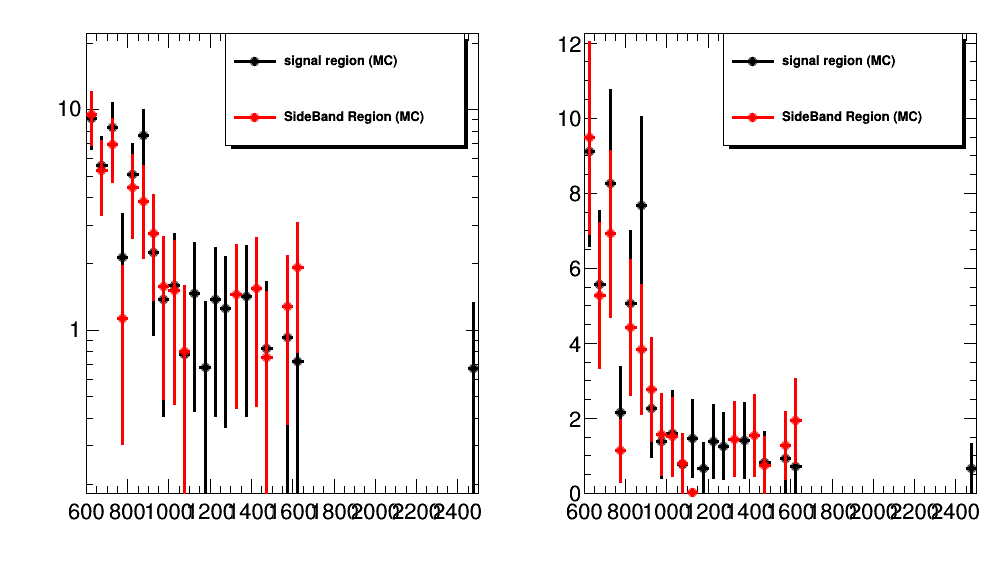

In [4]:
c1 = r.TCanvas("c1", "canvas", 1000, 600)
c1.SetLogy()
c1.Divide(2,1)
c1.cd(1)
r.gPad.SetLogy()
hSignal.SetTitle("Log axis")
hSignal.Draw()
hSideBand.Draw("same")
leg.Draw()
c1.cd(2)
hSignal.SetTitle("Normal axis")
hSignal.Draw()
hSideBand.Draw("same")
leg.Draw()

c1.Draw()

# Part-I

## Calculate alpha 

> by dividing W+jets MC in signal and side-band region


> Also fit the alpha

Alpha does not exists

****************************************
Minimizer is Linear
Chi2                      =      2.39153
NDf                       =           12
p0                        =       1.5289   +/-   0.497177    
p1                        = -0.000625758   +/-   0.000483672 
Integral =  3000.47926537
Integral =  1062.04857249


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


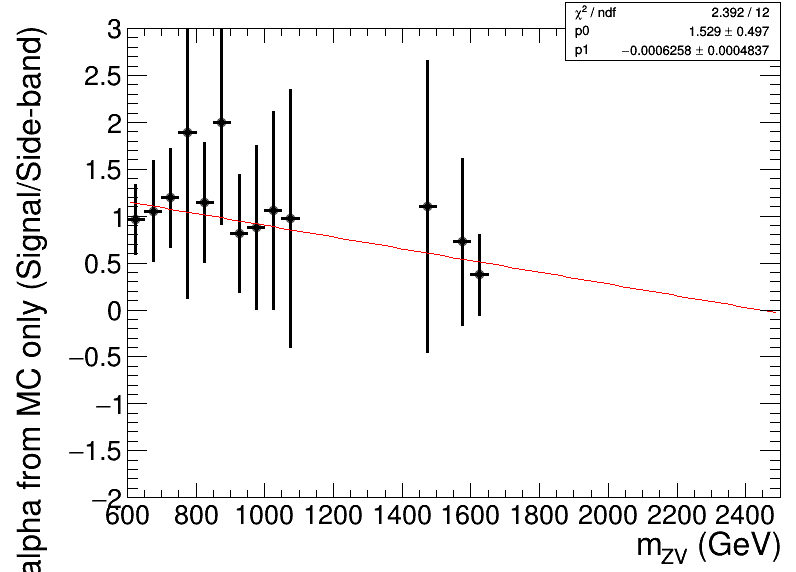

In [5]:
try: 
    Alpha.Delete();
except: 
    print "Alpha does not exists";
    
Alpha =  r.TH1D("Alpha","",38,600,2500)
Alpha = hSignal.Clone()
Alpha.Divide(hSideBand)
c1 = r.TCanvas("c1", "canvas", 800, 600)
Alpha.GetXaxis().SetTitle("m_{ZV} (GeV)")
Alpha.GetYaxis().SetTitle("alpha from MC only (Signal/Side-band)")
Alpha.SetMaximum(3.0)
Alpha.SetMinimum(-2.0)
Alpha.Draw()
f1 = r.TF1("f1","pol1",600,2500)
Alpha.Fit("f1")
c1.Draw()
print "Integral = ",Alpha.Integral("width")
print "Integral = ",f1.Integral(600,2500)
#for i in range(1,39):
#    print i,",",Alpha.GetBinContent(i),",",Alpha.GetBinLowEdge(i),",",Alpha.GetBinWidth(i)

## Rebin Alpha ( from 20 to 4 bins)

### Bin Center information

1. 600, 1075, 1550, 2025, 2500

Print alpha values in each bin: 


1 	600 650 => 625.0 1.13779870307
2 	650 700 => 675.0 1.1065108236
3 	700 750 => 725.0 1.07522294413
4 	750 800 => 775.0 1.04393506466
5 	800 850 => 825.0 1.01264718519
6 	850 900 => 875.0 0.981359305724
7 	900 950 => 925.0 0.950071426255
8 	950 1000 => 975.0 0.918783546786
9 	1000 1050 => 1025.0 0.887495667316
10 	1050 1100 => 1075.0 0.856207787847
11 	1100 1150 => 1125.0 0.824919908377
12 	1150 1200 => 1175.0 0.793632028908
13 	1200 1250 => 1225.0 0.762344149439
14 	1250 1300 => 1275.0 0.731056269969
15 	1300 1350 => 1325.0 0.6997683905
16 	1350 1400 => 1375.0 0.66848051103
17 	1400 1450 => 1425.0 0.637192631561
18 	1450 1500 => 1475.0 0.605904752092
19 	1500 1550 => 1525.0 0.574616872622
20 	1550 1600 => 1575.0 0.543328993153
21 	1600 1650 => 1625.0 0.512041113683
22 	1650 1700 => 1675.0 0.480753234214
23 	1700 1750 => 1725.0 0.449465354745
24 	1750 1800 => 1775.0 0.418177475275
25 	1800 1850 => 1825.0 0.386889595806
26 	1850 1900 => 1875.0 0.35560

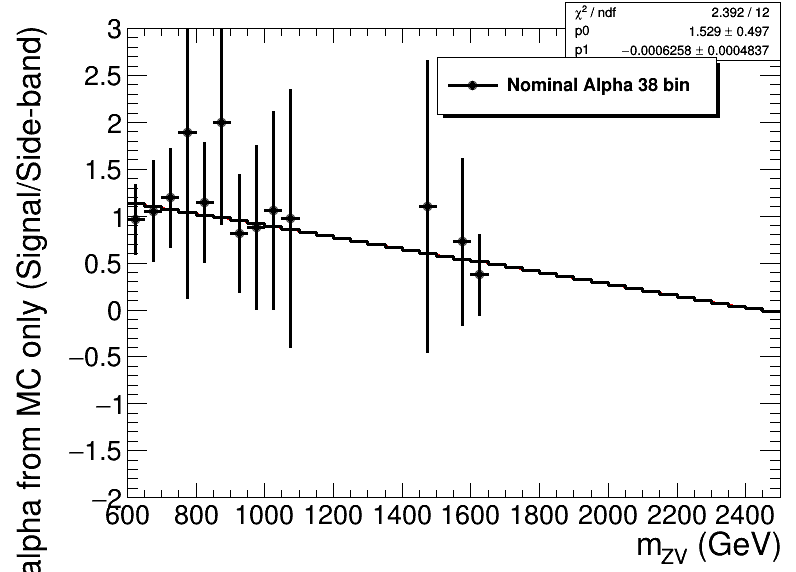

In [6]:
leg = r.TLegend(0.55,0.9,.9,0.8)

hAlpha_Fit_38bin = r.TH1F("hAlpha_Fit_38bin","",38,600,2500)
count = 1
import numpy as np
print "Print alpha values in each bin: \n\n"
for i in np.arange(600,2500,50):
    print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_38bin.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1

hAlpha_Fit_38bin.SetMarkerColor(1)
hAlpha_Fit_38bin.SetLineColor(1)
hAlpha_Fit_38bin.SetLineWidth(3)
hAlpha_Fit_38bin.SetMarkerSize(1)


leg.AddEntry(hAlpha_Fit_38bin,"Nominal Alpha 38 bin")
hAlpha_Fit_38bin.Draw("same")    
    
leg.Draw()

c1.Update()
c1.Draw()

## Get alpha 1-sigma Up

In [7]:
print "Parameter 1 = ",f1.GetParameter(0),"+/-",f1.GetParError(0)
print "Parameter 2 = ",f1.GetParameter(1),"+/-",f1.GetParError(1)

Parameter 1 =  1.52889719644 +/- 0.497177067909
Parameter 2 =  -0.000625757589388 +/- 0.00048367182389


In [8]:
f1.SetParameter(0,f1.GetParameter(0)+f1.GetParError(0))
f1.SetParameter(1,f1.GetParameter(1)+f1.GetParError(1))

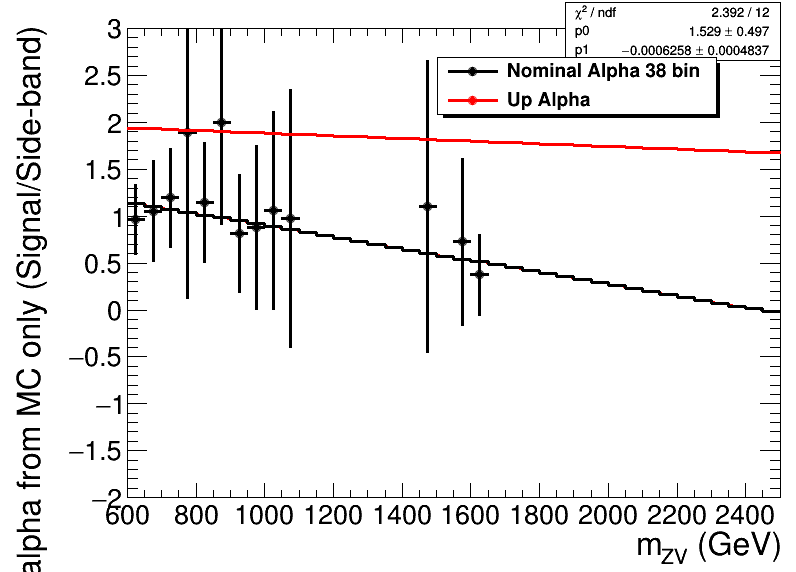

In [9]:
hAlpha_Fit_up = r.TH1F("hAlpha_Fit_up","",38,600,2500)

import numpy as np
count=1
for i in np.arange(600,2500,50):
    #print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_up.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1
    
hAlpha_Fit_up.SetMarkerColor(2)
hAlpha_Fit_up.SetLineColor(2)
#hAlpha_Fit.SetFillColor(1)
hAlpha_Fit_up.SetLineWidth(3)
hAlpha_Fit_up.SetMarkerSize(1)
leg.AddEntry(hAlpha_Fit_up,"Up Alpha")
hAlpha_Fit_up.Draw("same")
c1.Update()
c1.Draw()

## Get alpha 1-sigma Down

> Below to get 1-sigma down we need to multiply by 2 because earlier we add 1-sigma for getting 1-sigma up distribution for alpha

In [10]:
f1.SetParameter(0,f1.GetParameter(0)-2*f1.GetParError(0))
f1.SetParameter(1,f1.GetParameter(1)-2*f1.GetParError(1))

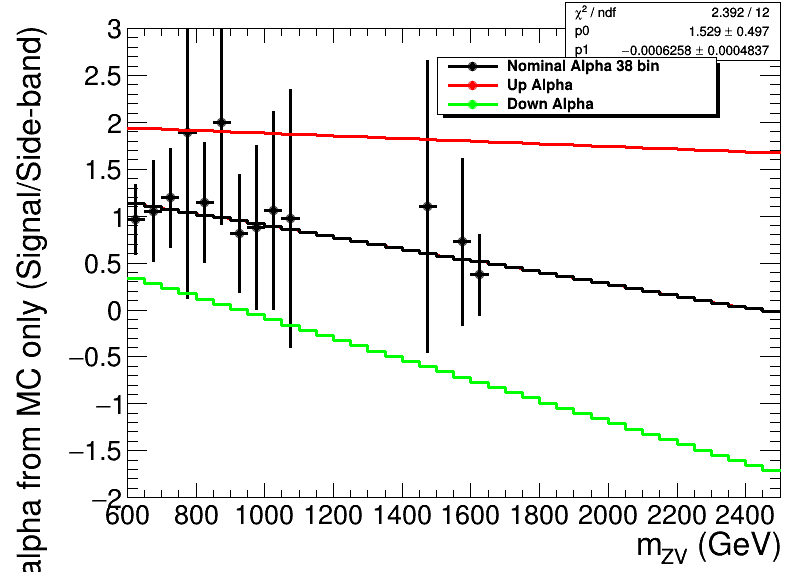

In [11]:
hAlpha_Fit_dn = r.TH1F("hAlpha_Fit_dn","",38,600,2500)

count=1
import numpy as np
for i in np.arange(600,2500,50):
    #print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_dn.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1
    

hAlpha_Fit_dn.SetMarkerColor(3)
hAlpha_Fit_dn.SetLineColor(3)
#hAlpha_Fit_dn.SetFillColor(1)
hAlpha_Fit_dn.SetLineWidth(3)
hAlpha_Fit_dn.SetMarkerSize(1)
leg.AddEntry(hAlpha_Fit_dn,"Down Alpha")
hAlpha_Fit_dn.Draw("same")
leg.Draw()
c1.Update()
c1.Draw()

### Get Back to nominal alpha

In [12]:
f1.SetParameter(0,f1.GetParameter(0)+1*f1.GetParError(0))
f1.SetParameter(1,f1.GetParameter(1)+1*f1.GetParError(1))

In [13]:
print "Parameter 1 = ",f1.GetParameter(0),"+/-",f1.GetParError(0)
print "Parameter 2 = ",f1.GetParameter(1),"+/-",f1.GetParError(1)

Parameter 1 =  1.52889719644 +/- 0.497177067909
Parameter 2 =  -0.000625757589388 +/- 0.00048367182389


# Get corrected W+jet in sideband region after fit to data

This histogram is saved in ExoVV fitter using create histogram method:

https://github.com/ram1123/EXOVVFitter/blob/master/g1_exo_doFit_class_new.py#L1795-L1796

But, this histogram was not taking the normalization so I have to scale it with the normalization. ***But, scaling the histogram also scaling the errors.***

59.6024966454
bin 1 content =  10.2067422867
bin 2 content =  8.46026611328
bin 3 content =  7.01263093948
bin 4 content =  5.81270027161


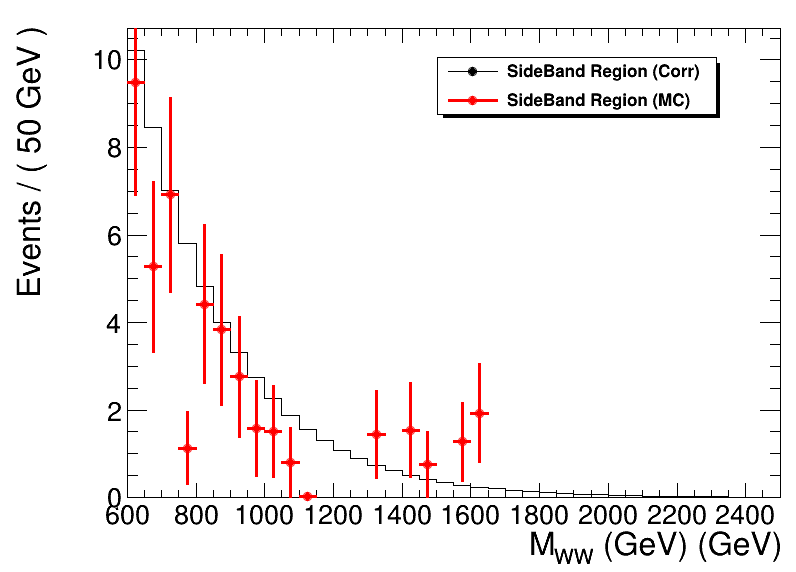

In [14]:
leg.Clear()
c1.Clear()
#Wjet_file = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13_BothLSBUSB/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")
Wjet_file = r.TFile.Open("ZV_RootFiles/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")

Wjet_hist = r.TH1F()
#Wjet_hist.Sumw2()
Wjet_hist = Wjet_file.Get("rrv_mass_lvj__rrv_mass_lvj")
#Wjet_hist = Wjet_file.Get("model_pdf_WJets0_xww_sb_lo_from_fitting_em_mlvj__rrv_mass_lvj")
Wjet_hist.Scale(59.69)
#Wjet_hist.Rebin(27)
print Wjet_hist.Integral()
#Wjet_hist.SetMaximum(150)
Wjet_hist.Draw("hist")
hSideBand.Draw("same")
#hLowerSideBand.Draw("same")
leg.AddEntry(Wjet_hist,"SideBand Region (Corr)")
leg.AddEntry(hSideBand,"SideBand Region (MC)")
leg.Draw()
#c1.SetLogy()
c1.Draw()

print "bin 1 content = ",Wjet_hist.GetBinContent(1)
print "bin 2 content = ",Wjet_hist.GetBinContent(2)
print "bin 3 content = ",Wjet_hist.GetBinContent(3)
print "bin 4 content = ",Wjet_hist.GetBinContent(4)

# Multiplication by Alpha to get Signal Region W+jets obtained from data.

Wjet yield =  58.8387239237
Bin 0 content =  11.6132173538
Bin 2 content =  9.36137676239
Bin 3 content =  7.54014205933
Bin 4 content =  6.06808137894
********************
MC bin contents: 

Bin 0 content =  9.12671539963
Bin 2 content =  5.56344870271
Bin 3 content =  8.27051703925
Bin 4 content =  2.14431807916


Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Nominal_38bins.root has been created
Warning in <TFile::Append>: Replacing existing TH1: hModel_Sig (Potential memory leak).
Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Up_38bins.root has been created
Warning in <TFile::Append>: Replacing existing TH1: hModel_Sig (Potential memory leak).
Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Down_38bins.root has been created


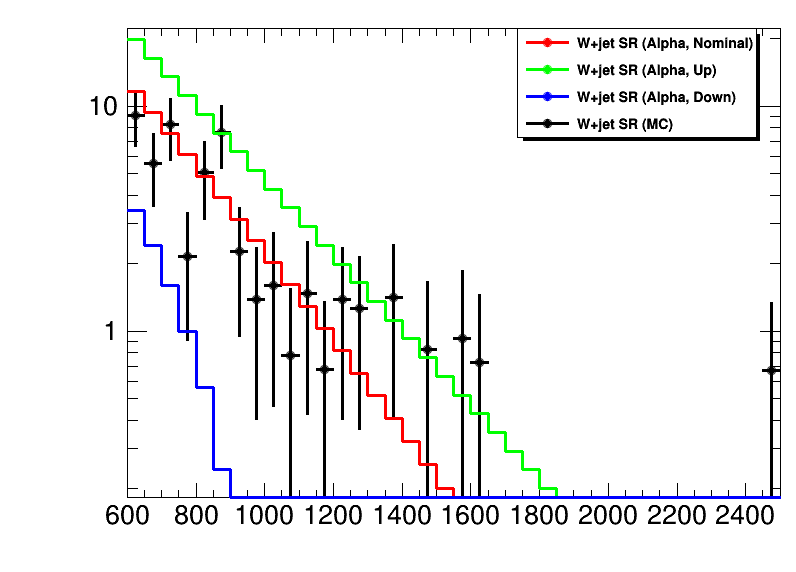

In [15]:
c1.Clear()
leg = r.TLegend(0.65,0.95,.95,0.76)


hModel_Sig = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig.Sumw2()
hModel_Sig.SetMarkerColor(2)
hModel_Sig.SetLineColor(2)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))

leg.AddEntry(hModel_Sig,"W+jet SR (Alpha, Nominal)")

hModel_Sig.SaveAs("Wjet_Corr_Shape_Nominal_38bins.root")




hModel_Sig_up = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig_up.Sumw2()
hModel_Sig_up.SetMarkerColor(3)
hModel_Sig_up.SetLineColor(3)
hModel_Sig_up.SetLineWidth(3)
hModel_Sig_up.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig_up.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_up.GetBinContent(i))

leg.AddEntry(hModel_Sig_up,"W+jet SR (Alpha, Up)")

hModel_Sig_up.SaveAs("Wjet_Corr_Shape_Up_38bins.root")

hModel_Sig_Down = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig_Down.Sumw2()
hModel_Sig_Down.SetMarkerColor(4)
hModel_Sig_Down.SetLineColor(4)
hModel_Sig_Down.SetLineWidth(3)
hModel_Sig_Down.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig_Down.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_dn.GetBinContent(i))

leg.AddEntry(hModel_Sig_Down,"W+jet SR (Alpha, Down)")



hModel_Sig_Down.SaveAs("Wjet_Corr_Shape_Down_38bins.root")




hSignal.Draw()
hModel_Sig.Draw("same")
hModel_Sig_up.Draw("same")
hModel_Sig_Down.Draw("same")

leg.AddEntry(hSignal,"W+jet SR (MC)")


leg.Draw()

print "Wjet yield = ", hModel_Sig.Integral()

print "Bin 0 content = ",hModel_Sig.GetBinContent(1)
print "Bin 2 content = ",hModel_Sig.GetBinContent(2)
print "Bin 3 content = ",hModel_Sig.GetBinContent(3)
print "Bin 4 content = ",hModel_Sig.GetBinContent(4)
print "*"*20
print "MC bin contents: \n"
print "Bin 0 content = ",hSignal.GetBinContent(1)
print "Bin 2 content = ",hSignal.GetBinContent(2)
print "Bin 3 content = ",hSignal.GetBinContent(3)
print "Bin 4 content = ",hSignal.GetBinContent(4)
c1.SetLogy(1)
c1.Draw()

Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Nominal_4bins.root has been created
Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Up_4bins.root has been created
Info in <TH1F::SaveAs>: ROOT file Wjet_Corr_Shape_Down_4bins.root has been created


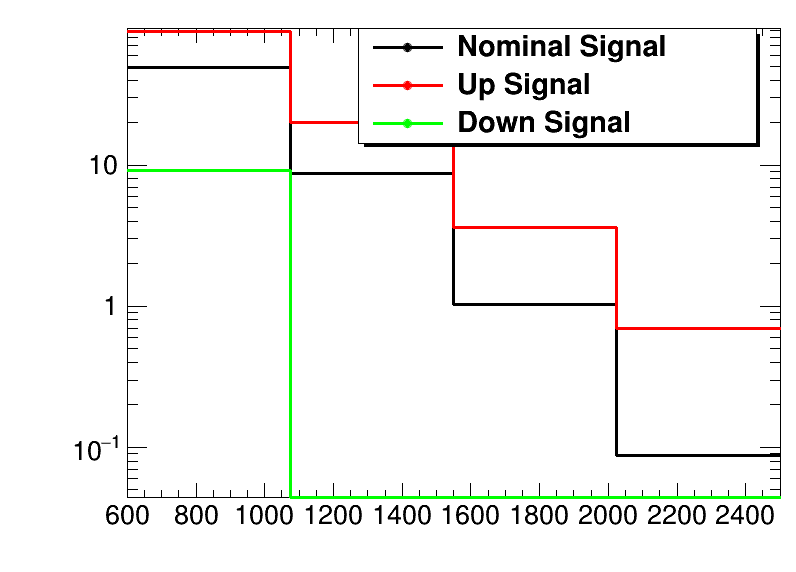

In [16]:
leg = r.TLegend(0.45,0.95,.95,0.75)

hModel_Sig_new = r.TH1F("hModel_Sig_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig.GetBinContent(i)
    bin[count] += hModel_Sig.GetBinContent(i)

hModel_Sig_new.SetBinContent(1,bin[1])
hModel_Sig_new.SetBinContent(2,bin[2])
hModel_Sig_new.SetBinContent(3,bin[3])
hModel_Sig_new.SetBinContent(4,bin[4])

hModel_Sig_new.SetMarkerColor(1)
hModel_Sig_new.SetLineColor(1)
hModel_Sig_new.SetLineWidth(3)
hModel_Sig_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_new,"Nominal Signal")
hModel_Sig_new.SaveAs("Wjet_Corr_Shape_Nominal_4bins.root")

#########################################################
hModel_Sig_up_new = r.TH1F("hModel_Sig_up_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig_up.GetBinContent(i)
    bin[count] += hModel_Sig_up.GetBinContent(i)

hModel_Sig_up_new.SetBinContent(1,bin[1])
hModel_Sig_up_new.SetBinContent(2,bin[2])
hModel_Sig_up_new.SetBinContent(3,bin[3])
hModel_Sig_up_new.SetBinContent(4,bin[4])

hModel_Sig_up_new.SetMarkerColor(2)
hModel_Sig_up_new.SetLineColor(2)
hModel_Sig_up_new.SetLineWidth(3)
hModel_Sig_up_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_up_new,"Up Signal")

    
hModel_Sig_up_new.SaveAs("Wjet_Corr_Shape_Up_4bins.root")

#########################################################
hModel_Sig_Down_new = r.TH1F("hModel_Sig_Down_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig_Down.GetBinContent(i)
    bin[count] += hModel_Sig_Down.GetBinContent(i)

hModel_Sig_Down_new.SetBinContent(1,bin[1])
hModel_Sig_Down_new.SetBinContent(2,bin[2])
hModel_Sig_Down_new.SetBinContent(3,bin[3])
hModel_Sig_Down_new.SetBinContent(4,bin[4])

hModel_Sig_Down_new.SetMarkerColor(3)
hModel_Sig_Down_new.SetLineColor(3)
hModel_Sig_Down_new.SetLineWidth(3)
hModel_Sig_Down_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_Down_new,"Down Signal")

hModel_Sig_Down_new.SaveAs("Wjet_Corr_Shape_Down_4bins.root")

c1.Clear()
hModel_Sig_new.Draw()
hModel_Sig_up_new.Draw("same")
hModel_Sig_Down_new.Draw("same")
leg.Draw()
c1.Draw()

In [17]:
c1.Clear()
fin_Wjet_MC = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")
fin_VV = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VV.root")
fin_TTbar = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_TTbar.root")
fin_STop = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_STop.root")
fin_Data = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13/HaddedFiles/Hadds_for_BkgEstimation/WWTree_data_golden.root")

treeIn_Wjet_MC = fin_Wjet_MC.Get("otree")
treeIn_VV = fin_VV.Get("otree")
treeIn_TTbar = fin_TTbar.Get("otree")
treeIn_STop = fin_STop.Get("otree")
treeIn_Data = fin_Data.Get("otree")

In [18]:
hModel_Sig.SetMarkerColor(625)
hModel_Sig.SetLineColor(625)
hModel_Sig.SetFillColor(625)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(1)

hWjets_MC = r.TH1D("hWjets_MC","",38,600,2500)
hWjets_MC.SetMarkerColor(607)
hWjets_MC.SetLineColor(607)
hWjets_MC.SetFillColor(607)
hWjets_MC.SetLineWidth(3)
hWjets_MC.SetMarkerSize(1)

hVV = r.TH1D("hVV","",38,600,2500)
hVV.SetMarkerColor(607)
hVV.SetLineColor(607)
hVV.SetFillColor(607)
hVV.SetLineWidth(3)
hVV.SetMarkerSize(1)

hTTbar = r.TH1D("hTTbar","",38,600,2500)
hTTbar.SetMarkerColor(592)
hTTbar.SetLineColor(592)
hTTbar.SetFillColor(592)
hTTbar.SetLineWidth(3)
hTTbar.SetMarkerSize(1)

hSTop = r.TH1D("hSTop","",38,600,2500)
hSTop.SetMarkerColor(854)
hSTop.SetLineColor(854)
hSTop.SetFillColor(854)
hSTop.SetLineWidth(3)
hSTop.SetMarkerSize(1)

hData = r.TH1D("hData","",38,600,2500)
hData.SetMarkerColor(1)
hData.SetLineColor(1)
#hData.SetFillColor(1)
hData.SetLineWidth(3)
hData.SetMarkerSize(1)

treeIn_Wjet_MC.Draw("mass_llj_PuppiAK8>>hWjets_MC",cutString_SideBand)
treeIn_VV.Draw("mass_llj_PuppiAK8>>hVV",cutString_SideBand)
treeIn_TTbar.Draw("mass_llj_PuppiAK8>>hTTbar",cutString_SideBand)
treeIn_STop.Draw("mass_llj_PuppiAK8>>hSTop",cutString_SideBand)

#cutString_SigData =  "((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so_corr>55) && (PuppiAK8_jet_mass_so_corr<65)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"
# Define the cuts
cutString_SideBand       =  "((type==0||type==1) && (l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (l_pt2>30 && (((type==0)&&(abs(l_eta2)<2.4)) || ((type==1)&&((abs(l_eta2)<2.5)&&!(abs(l_eta2)>1.4442 && abs(l_eta2)<1.566))))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((((PuppiAK8_jet_mass_so_corr>40) && (PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>110) && (PuppiAK8_jet_mass_so_corr<150)))) && (mass_llj_PuppiAK8>600))"

cutString_SigData         =  "((type==0||type==1) && (l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (l_pt2>30 && (((type==0)&&(abs(l_eta2)<2.4)) || ((type==1)&&((abs(l_eta2)<2.5)&&!(abs(l_eta2)>1.4442 && abs(l_eta2)<1.566))))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((((PuppiAK8_jet_mass_so_corr>65) && (PuppiAK8_jet_mass_so_corr<110)))) && (mass_llj_PuppiAK8>600))"

#cutString_SigData =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) && (PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

#cutString_SideBand =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>105)&&(PuppiAK8_jet_mass_so_corr<150))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"



treeIn_Data.Draw("mass_llj_PuppiAK8>>hData",cutString_SideBand)

62L

In [19]:
stack = r.THStack()

stack.Add(hSTop,"F")
stack.Add(hTTbar,"F")
stack.Add(hVV,"F")
stack.Add(hModel_Sig,"F")
#stack.Add(newHist,"F")

leg.AddEntry(hSTop,"STop")
leg.AddEntry(hTTbar,"TTbar")
leg.AddEntry(hVV,"Diboson")
leg.AddEntry(hModel_Sig,"Wjets")
leg.AddEntry(hData,"Data")



#stack.SetMinimum(0.001)
stack.SetMaximum(15.0)

stack.Draw("hist")
hData.Draw("same hist")
leg.Draw()


#c1.Draw()

35.9 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 25 points have been skipped
Info in <TCanvas::Print>: png file Cross_Check_DataMC_WithWjet_Corr.png has been created
Info in <TCanvas::Print>: pdf file Cross_Check_DataMC_WithWjet_Corr.pdf has been created


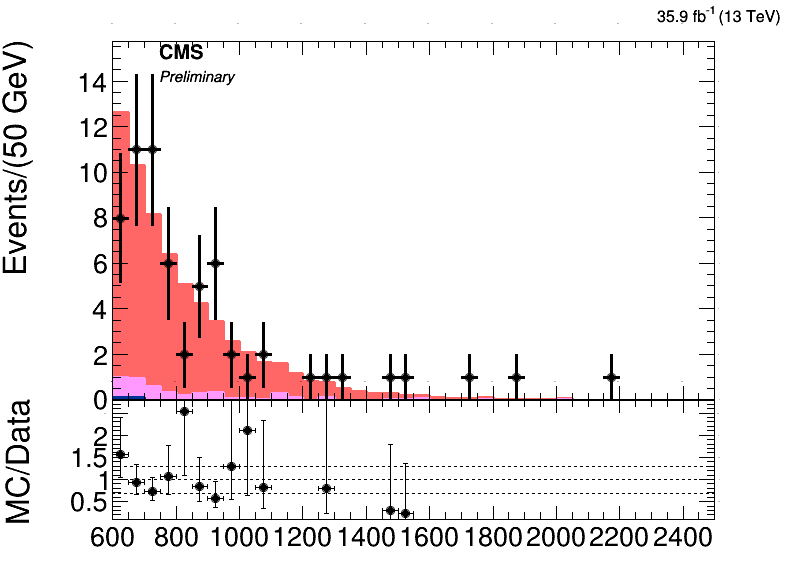

In [20]:
c1 = r.TCanvas("c1", "canvas", 800, 600)

CMS_lumi.lumi_13TeV = "35.9 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"

CMS_lumi.relPosX = 0.05

rp = r.TRatioPlot(stack, hData);
#c.SetTicks(0, 1);
rp.Draw();
rp.GetLowerRefYaxis().SetTitle("MC/Data");
rp.GetUpperRefYaxis().SetTitle("Events/(50 GeV)");
rp.GetLowerRefXaxis().SetTitle("M_{ww}");
rp.GetLowerRefGraph().SetMinimum(0.1);
rp.GetLowerRefGraph().SetMaximum(2.8);

rp.SetLeftMargin(0.14);
# rp.SetRightMargin(0.05);
# rp.SetUpTopMargin(0.05);
# rp.SetSeparationMargin(0.005);
# rp.SetLowBottomMargin(0.46);

# rp.Draw("errasymfhidelow");
# rp.SetSplitFraction(0.10);
# rp.GetLowYaxis().SetNdivisions(4);
# rp.GetLowerRefYaxis().SetTitle("Pred./Data");
# rp.GetLowerRefGraph().SetMinimum(1.5);
# rp.GetLowerRefGraph().SetMaximum(0.5);
# rp.GetLowerRefYaxis().SetRangeUser(0.5, 1.5);
    
    
rp.SetSeparationMargin(0.0)

CMS_lumi.CMS_lumi(c1, 4, 11)
c1.Update();
c1.Draw()
c1.SaveAs("Cross_Check_DataMC_WithWjet_Corr.png")
c1.SaveAs("Cross_Check_DataMC_WithWjet_Corr.pdf")

In [21]:
print "Program is done..."

Program is done...
